## Predicting whether the Gearbox is faulty or not using Machine Learning.

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether the gearbox is faulty or not based on the feature values.

**Approach:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Definition:
In a statement,

> Given parameters about a gearbox, can we predict whether it is faulty or not?

### 2. Data:
The data given is masked due to terms & conditions of the company. However, it closely resembles the original data. The given data is recorded by sensors attached on the gearbox.

### 3. Evaluation:
If the model can reach accuracy of 90% at predicting whether the gearbox is in faulty condition or not.

### 4. Features:
The features are decided by the technical team of the company. Only those features are considered which are necessary for Machine Learning model preparation.

**Data Dictionary:**
1. id - The serial number of particular row in dataset.
2. gear_type - The type of gearbox distinguished based on its functioning.
 * Manual
 * Automatic
 * Semi-Automatic
3. weight(tonnes) - The weight of gearbox measured in tonne (1 tonne = 1000 Kilograms)
4. size - The size of shaft of gearbox.
5. temperature(Celsius) - The temperature of gearbox when its functioning.
6. pressure(psi) - The pressure exerted on shaft during the working of gearbox. (1 Pound Per Square Inch = 0.068046 Atmospheric Pressure).
7. vibration(Hz) - The overall vibration in 3D plane of gearbox.
8. oil_level - The oil level in the container of gearbox.
 * 1 - Low
 * 2 - Medium
 * 3 - High
9. oil_quality - The quality of oil used in gearbox. It also degrades, as gearbox functions, over a period of time.
 * 1 - Contaminated
 * 2 - Dirty
 * 3 - Clean
10. noise(db) - The noise produced by gearbox. (db - Decibel)
11. power(kW) - The power output of gearbox. (1 Kilowatt = 1.34102 Mechanical Horsepower)
12. torque(rpm) - The torque exerted by the shaft of gearbox. (rpm - Rotations Per Minute)
13. hours_run - The total hours for which the gearbox was used.
14. manufacturer - The company which manufactured the gearbox which is ELECON ENGINEERING CO. LTD.
15. supplier - The company which supplied the gearbox which is ELECON ENGINEERING CO. LTD.
16. faulty - The binary value stating whether the gearbox is faulty or not.
  * 0 - Not Faulty
  * 1 - Faulty

![ml101-6-step-ml-framework.png](ml101-6-step-ml-framework.png)

![sklearn-workflow-title.png](sklearn-workflow-title.png)

## Preparing the tools
Importing the required libraries - NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Loading the Data

In [2]:
data = pd.read_csv("./gearbox_data_final.csv")
data

,id,gear_type,weight(tonne),size,temperature(Celsius),pressure(psi),vibration(Hz),oil_level,oil_quality,noise(db),power(kW),torque(rpm),hours_run,manufacturer,supplier,faulty
0,0,Automatic,21,23,194,310,210,2,1,71,94,149,15079,ELECON,ELECON,1
1,1,Manual,18,41,185,231,464,1,2,75,116,118,17575,ELECON,ELECON,1
2,2,Semi-Automatic,16,29,185,169,397,1,3,145,107,57,16668,ELECON,ELECON,1
3,3,Manual,15,38,116,245,243,3,3,81,118,81,15198,ELECON,ELECON,0
4,4,Manual,34,29,185,303,339,2,3,117,100,97,15227,ELECON,ELECON,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,Semi-Automatic,18,29,103,215,323,1,2,100,103,136,19085,ELECON,ELECON,1
99996,99996,Semi-Automatic,40,38,185,321,473,2,2,73,117,91,16014,ELECON,ELECON,1
99997,99997,Automatic,99,24,160,297,398,1,2,74,120,85,15203,ELECON,ELECON,0
99998,99998,Manual,43,26,101,131,348,3,2,110,98,122,17350,ELECON,ELECON,0


In [3]:
data.shape

(100000, 16)

## Data Exploration (exploratory data analysis or EDA)
Here following steps are taken:
1. Whether to fill or remove missing values.
2. The kind of data i.e. the datatype and how to process it.
3. To handle outliers.
4. Whether to remove, modify or add features to get more out of data.

In [4]:
data.head()

,id,gear_type,weight(tonne),size,temperature(Celsius),pressure(psi),vibration(Hz),oil_level,oil_quality,noise(db),power(kW),torque(rpm),hours_run,manufacturer,supplier,faulty
0,0,Automatic,21,23,194,310,210,2,1,71,94,149,15079,ELECON,ELECON,1
1,1,Manual,18,41,185,231,464,1,2,75,116,118,17575,ELECON,ELECON,1
2,2,Semi-Automatic,16,29,185,169,397,1,3,145,107,57,16668,ELECON,ELECON,1
3,3,Manual,15,38,116,245,243,3,3,81,118,81,15198,ELECON,ELECON,0
4,4,Manual,34,29,185,303,339,2,3,117,100,97,15227,ELECON,ELECON,1


In [5]:
data.tail()

,id,gear_type,weight(tonne),size,temperature(Celsius),pressure(psi),vibration(Hz),oil_level,oil_quality,noise(db),power(kW),torque(rpm),hours_run,manufacturer,supplier,faulty
99995,99995,Semi-Automatic,18,29,103,215,323,1,2,100,103,136,19085,ELECON,ELECON,1
99996,99996,Semi-Automatic,40,38,185,321,473,2,2,73,117,91,16014,ELECON,ELECON,1
99997,99997,Automatic,99,24,160,297,398,1,2,74,120,85,15203,ELECON,ELECON,0
99998,99998,Manual,43,26,101,131,348,3,2,110,98,122,17350,ELECON,ELECON,0
99999,99999,Automatic,39,50,156,265,208,3,1,88,96,75,17299,ELECON,ELECON,1


In [6]:

data.drop(["id", "gear_type", "manufacturer", "supplier"], axis=1, inplace=True)

In [7]:
data.head()

,weight(tonne),size,temperature(Celsius),pressure(psi),vibration(Hz),oil_level,oil_quality,noise(db),power(kW),torque(rpm),hours_run,faulty
0,21,23,194,310,210,2,1,71,94,149,15079,1
1,18,41,185,231,464,1,2,75,116,118,17575,1
2,16,29,185,169,397,1,3,145,107,57,16668,1
3,15,38,116,245,243,3,3,81,118,81,15198,0
4,34,29,185,303,339,2,3,117,100,97,15227,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   weight(tonne)         100000 non-null  int64
 1   size                  100000 non-null  int64
 2   temperature(Celsius)  100000 non-null  int64
 3   pressure(psi)         100000 non-null  int64
 4   vibration(Hz)         100000 non-null  int64
 5   oil_level             100000 non-null  int64
 6   oil_quality           100000 non-null  int64
 7   noise(db)             100000 non-null  int64
 8   power(kW)             100000 non-null  int64
 9   torque(rpm)           100000 non-null  int64
 10  hours_run             100000 non-null  int64
 11  faulty                100000 non-null  int64
dtypes: int64(12)
memory usage: 9.2 MB


In [9]:
data.isna().sum()

weight(tonne)           0
size                    0
temperature(Celsius)    0
pressure(psi)           0
vibration(Hz)           0
oil_level               0
oil_quality             0
noise(db)               0
power(kW)               0
torque(rpm)             0
hours_run               0
faulty                  0
dtype: int64

In [10]:
data.describe()

,weight(tonne),size,temperature(Celsius),pressure(psi),vibration(Hz),oil_level,oil_quality,noise(db),power(kW),torque(rpm),hours_run,faulty
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,54.978370,35.041180,149.927130,229.702480,349.781010,1.999180,2.003180,110.052890,100.08540,100.142900,17495.505600,0.80538
std,25.972375,8.674855,28.907951,75.052847,86.673942,0.707393,0.706438,23.071495,11.56459,28.867961,1441.323845,0.39591
min,10.000000,20.000000,100.000000,100.000000,200.000000,1.000000,1.000000,70.000000,80.00000,50.000000,15000.000000,0.00000
25%,33.000000,28.000000,125.000000,165.000000,275.000000,1.000000,2.000000,90.000000,90.00000,75.000000,16247.000000,1.00000
50%,55.000000,35.000000,150.000000,230.000000,350.000000,2.000000,2.000000,110.000000,100.00000,100.000000,17498.000000,1.00000
75%,78.000000,43.000000,175.000000,295.000000,425.000000,2.000000,3.000000,130.000000,110.00000,125.000000,18741.000000,1.00000
max,100.000000,50.000000,200.000000,360.000000,500.000000,3.000000,3.000000,150.000000,120.00000,150.000000,20000.000000,1.00000


In [11]:
data["faulty"].value_counts()

faulty
1    80538
0    19462
Name: count, dtype: int64

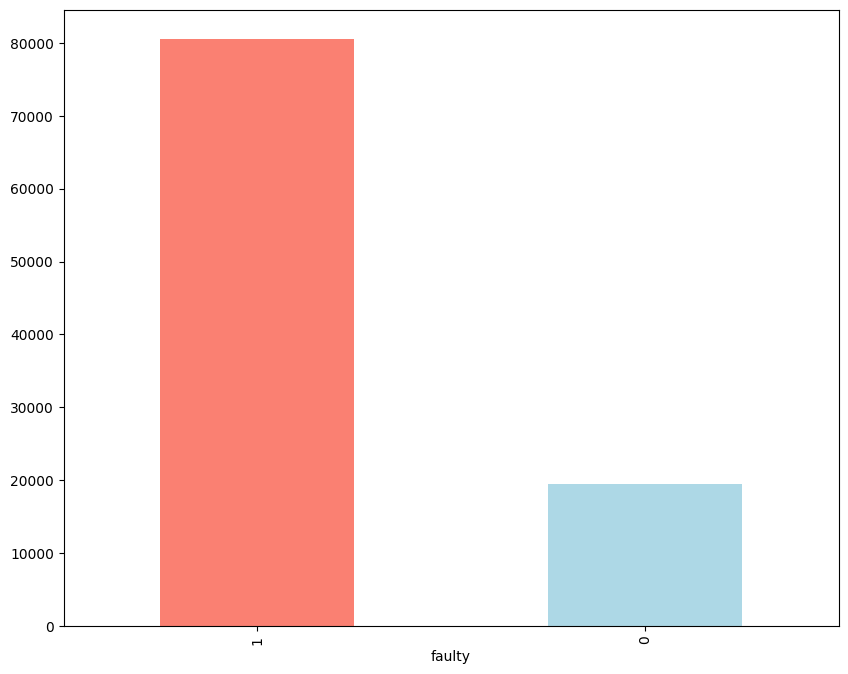

In [12]:
data["faulty"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], figsize=(10, 8));

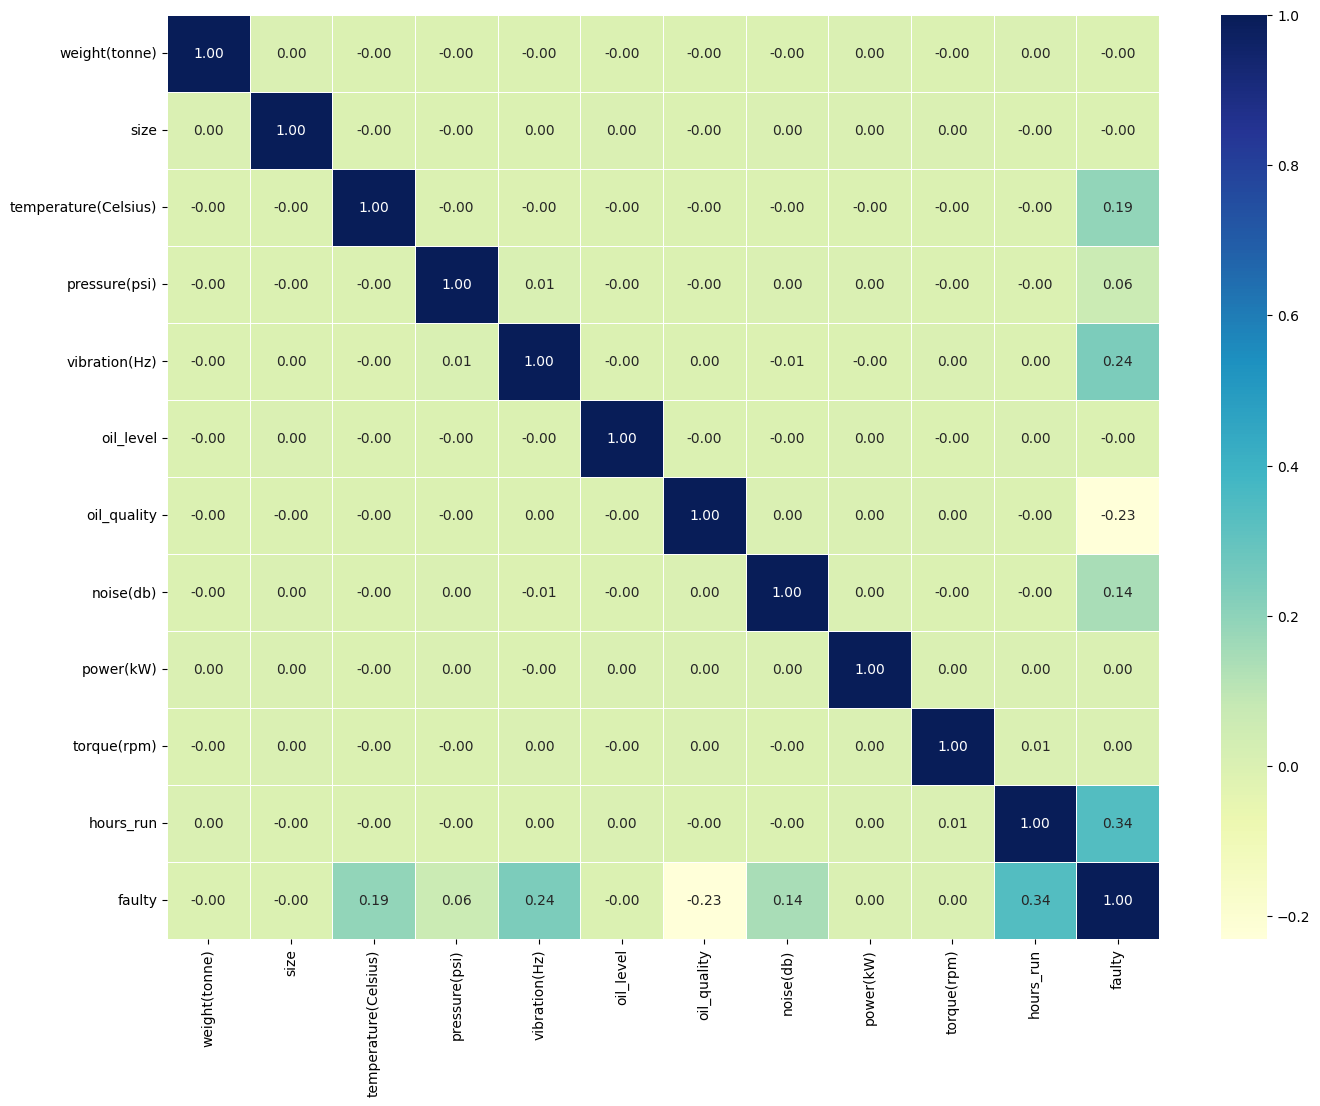

In [13]:
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

**Note:** As the correlation value of weight, size, oil_level, power and torque with the faulty parameter is `0.00` it can be ignored.

In [14]:
data.drop(["weight(tonne)", "size", "oil_level", "power(kW)", "torque(rpm)"], axis=1, inplace=True)

In [15]:
data.head()

,temperature(Celsius),pressure(psi),vibration(Hz),oil_quality,noise(db),hours_run,faulty
0,194,310,210,1,71,15079,1
1,185,231,464,2,75,17575,1
2,185,169,397,3,145,16668,1
3,116,245,243,3,81,15198,0
4,185,303,339,3,117,15227,1


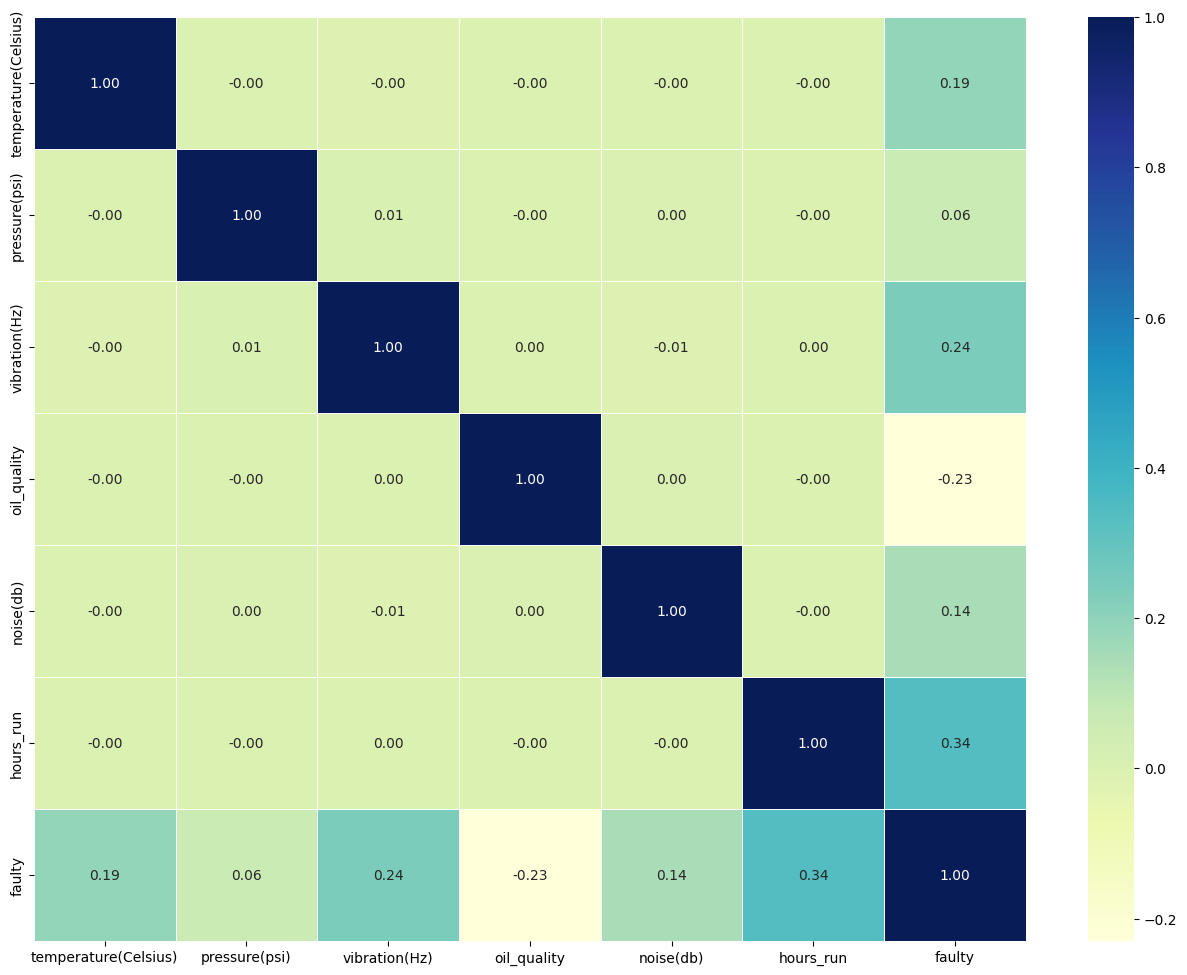

In [16]:
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modelling

In [17]:
data.head()

,temperature(Celsius),pressure(psi),vibration(Hz),oil_quality,noise(db),hours_run,faulty
0,194,310,210,1,71,15079,1
1,185,231,464,2,75,17575,1
2,185,169,397,3,145,16668,1
3,116,245,243,3,81,15198,0
4,185,303,339,3,117,15227,1


In [18]:
X = data.drop("faulty", axis=1)
y = data["faulty"]

In [19]:
X

,temperature(Celsius),pressure(psi),vibration(Hz),oil_quality,noise(db),hours_run
0,194,310,210,1,71,15079
1,185,231,464,2,75,17575
2,185,169,397,3,145,16668
3,116,245,243,3,81,15198
4,185,303,339,3,117,15227
...,...,...,...,...,...,...
99995,103,215,323,2,100,19085
99996,185,321,473,2,73,16014
99997,160,297,398,2,74,15203
99998,101,131,348,2,110,17350


In [20]:
y

0        1
1        1
2        1
3        0
4        1
        ..
99995    1
99996    1
99997    0
99998    0
99999    1
Name: faulty, Length: 100000, dtype: int64

In [21]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train

,temperature(Celsius),pressure(psi),vibration(Hz),oil_quality,noise(db),hours_run
75220,148,113,408,2,105,18706
48955,186,181,383,3,101,18411
44966,124,202,347,2,99,15689
13568,135,291,208,2,98,15754
92727,108,311,379,3,146,17185
...,...,...,...,...,...,...
6265,167,125,450,2,133,18199
54886,136,236,279,3,96,16064
76820,157,139,298,2,100,15213
860,141,300,418,3,117,15247


In [23]:
y_train

75220    1
48955    1
44966    0
13568    0
92727    1
        ..
6265     1
54886    0
76820    0
860      1
15795    1
Name: faulty, Length: 80000, dtype: int64

In [24]:
len(X_train), len(y_train)

(80000, 80000)

![sklearn-ml-map](sklearn-ml-map.png)


### Models to be used:
1. Support Vector Machine.
2. Naive Bayes.
3. KNeighbors Classifier.

In [25]:
models = {"Support Vector Machine":SVC(),
          "Naive Bayes":GaussianNB(),
          "KNeighbors Classifier":KNeighborsClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """

    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():

        model.fit(X_train, y_train)

        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Support Vector Machine': 0.80715,
 'Naive Bayes': 0.90055,
 'KNeighbors Classifier': 0.87255}

## Model Comparison

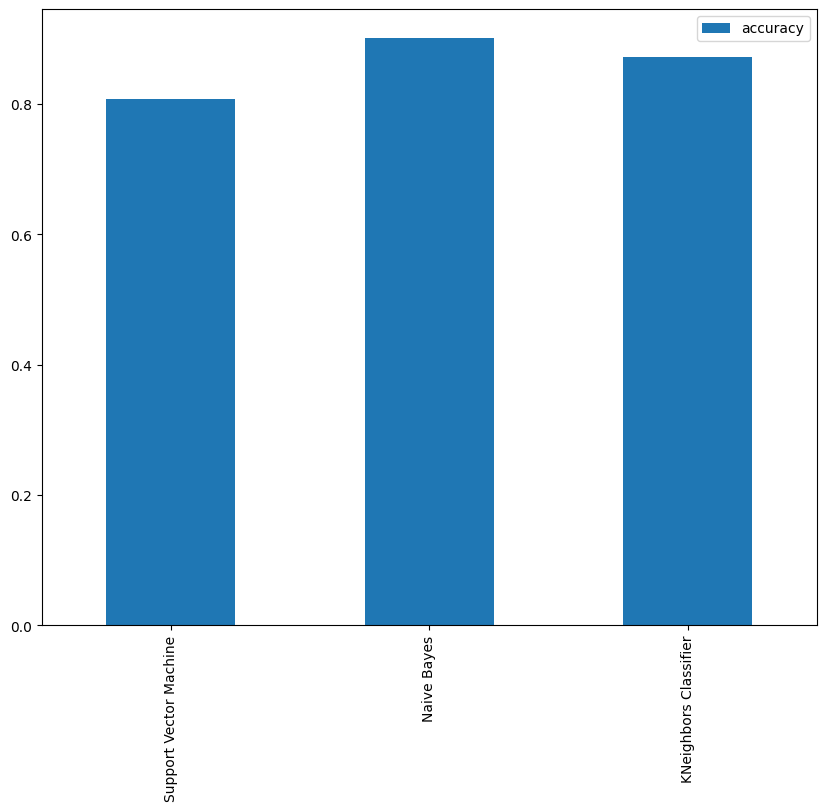

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(10, 8));

The baseline model will be **Naive Bayes** as it gave the highest accuracy.

### The following steps will be performed:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning of Naive Bayes Classifier

In [28]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [29]:
parameter_grid = {
    "priors":[None],
    "var_smoothing":[1e-11, 1e-10, 1e-9]
}
gs_naive_bayes = GridSearchCV(estimator=GaussianNB(),
                              param_grid=parameter_grid,
                              verbose=3,
                              scoring='accuracy').fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..priors=None, var_smoothing=1e-11;, score=0.899 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-11;, score=0.903 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-11;, score=0.904 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-11;, score=0.903 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-11;, score=0.900 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-10;, score=0.899 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-10;, score=0.903 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-10;, score=0.904 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-10;, score=0.903 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-10;, score=0.900 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-09;, score=0.899 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-09;,

In [30]:
gs_naive_bayes.best_params_

{'priors': None, 'var_smoothing': 1e-11}

In [31]:
gs_naive_bayes.best_estimator_.score(X_test, y_test)

0.9005

### Hyperparameter tuning of KNeighbors Classifier

In [32]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [33]:
train_scores = []
test_scores = []

neighbors = range(1, 11)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [34]:
train_scores

[1.0,
 0.9224375,
 0.9322375,
 0.9137375,
 0.9175875,
 0.909425,
 0.9107875,
 0.90715,
 0.9075,
 0.9055875]

In [35]:
test_scores

[0.8526,
 0.8474,
 0.86725,
 0.8656,
 0.87255,
 0.87335,
 0.87735,
 0.8773,
 0.87745,
 0.87745]

Maximum KNN score on the test data: 87.74%


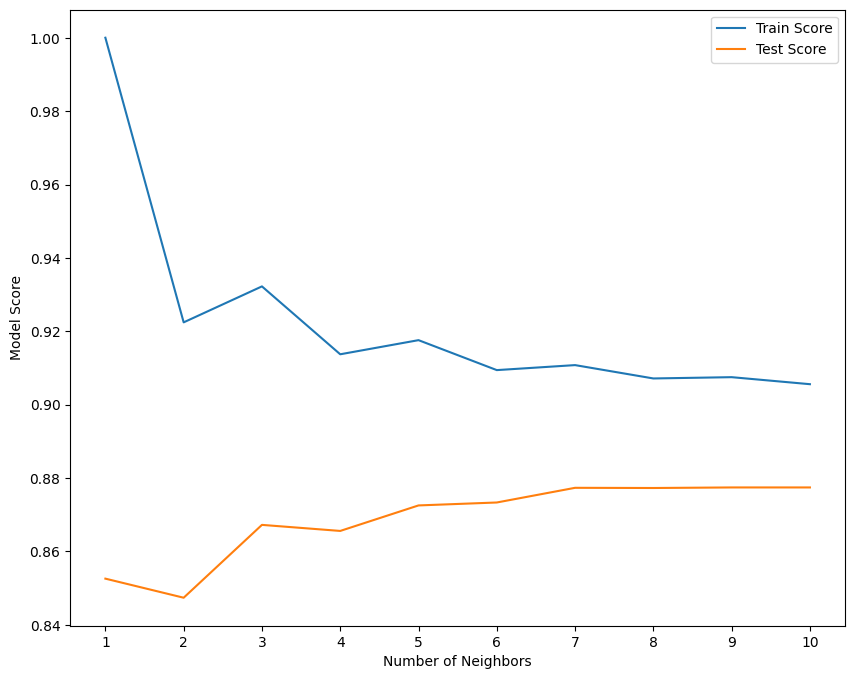

In [36]:
plt.figure(figsize=(10, 8))
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [37]:
param_grid = {
    'n_neighbors':[2, 9],
    'weights':['uniform', 'distance'],
    'metric':['minkowski','euclidean','manhattan']
}
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=param_grid,
                      verbose=3,
                      scoring='accuracy').fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END metric=minkowski, n_neighbors=2, weights=uniform;, score=0.840 total time=   1.5s
[CV 2/5] END metric=minkowski, n_neighbors=2, weights=uniform;, score=0.841 total time=   1.3s
[CV 3/5] END metric=minkowski, n_neighbors=2, weights=uniform;, score=0.840 total time=   1.0s
[CV 4/5] END metric=minkowski, n_neighbors=2, weights=uniform;, score=0.844 total time=   1.0s
[CV 5/5] END metric=minkowski, n_neighbors=2, weights=uniform;, score=0.841 total time=   1.0s
[CV 1/5] END metric=minkowski, n_neighbors=2, weights=distance;, score=0.848 total time=   0.3s
[CV 2/5] END metric=minkowski, n_neighbors=2, weights=distance;, score=0.852 total time=   0.3s
[CV 3/5] END metric=minkowski, n_neighbors=2, weights=distance;, score=0.848 total time=   0.3s
[CV 4/5] END metric=minkowski, n_neighbors=2, weights=distance;, score=0.854 total time=   0.3s
[CV 5/5] END metric=minkowski, n_neighbors=2, weights=distance;, score=0.848 tot

In [38]:
gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [39]:
gs_knn.best_estimator_.score(X_test, y_test)

0.8896

### Hyperparameter tuning for Support Vector Machine

In [40]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Note:** `SVC()` takes quadratic time to classify data. Therefore, `GridSearchCV()` wil take much time on lower-end laptop. The grid search was performed on the company laptop and the hyperparameter with best combination were:
1. C = 1000
2. gamma = 0.001
3. kernel = linear

In [41]:
gs_svc = SVC(C=1000,
             gamma=0.001,
             kernel='linear')

In [42]:
gs_svc.fit(X_train, y_train)

SVC(C=1000, gamma=0.001, kernel='linear')

In [43]:
gs_svc.score(X_test, y_test)

0.85165

## Evaluating the tuned model:
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

# Confusion Matrix Anatomy

![confusionmatrix.png](confusionmatrix.png)

# ROC Curve Anatomy

![roc-triangle.png](roc-triangle.png)

## 1. Evaluating Naive Bayes Model

In [44]:
y_prediction_gs_naive_bayes = gs_naive_bayes.predict(X_test)

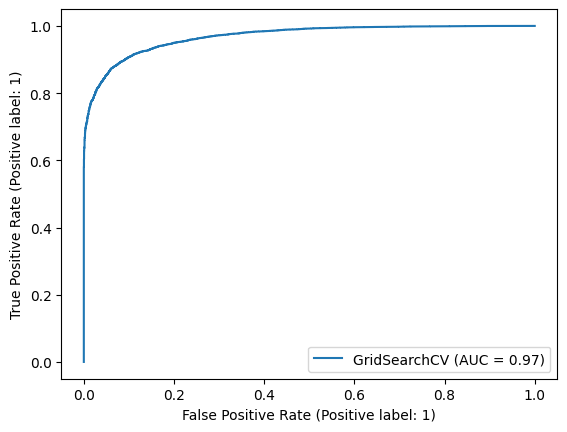

In [45]:
#ROC stands for Receiver Operating Characteristic.
svc_disp = RocCurveDisplay.from_estimator(gs_naive_bayes, X_test, y_test)

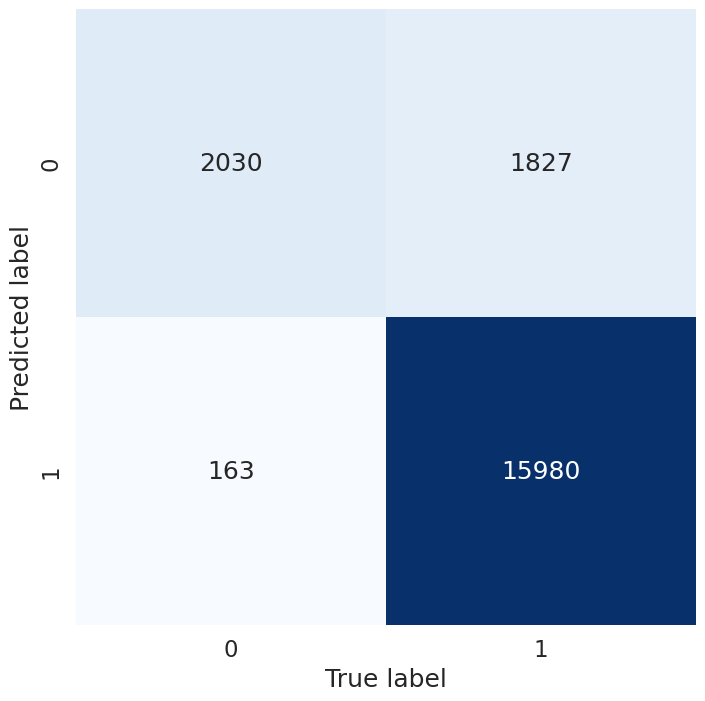

In [46]:
# Confusion Matrix.
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     fmt='g',
                     cmap='Blues',
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test, y_prediction_gs_naive_bayes)

In [47]:
print(classification_report(y_test, y_prediction_gs_naive_bayes))

              precision    recall  f1-score   support

           0       0.93      0.53      0.67      3857
           1       0.90      0.99      0.94     16143

    accuracy                           0.90     20000
   macro avg       0.91      0.76      0.81     20000
weighted avg       0.90      0.90      0.89     20000



## 2. Evaluating KNeighbors Classifier

In [48]:
y_prediction_gs_knn = gs_knn.predict(X_test)

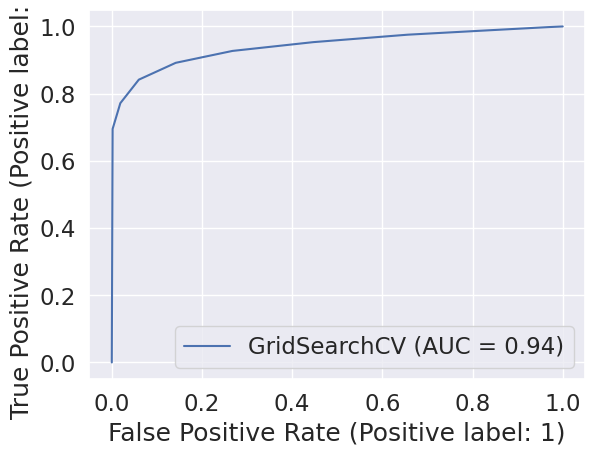

In [49]:
svc_disp = RocCurveDisplay.from_estimator(gs_knn, X_test, y_test)

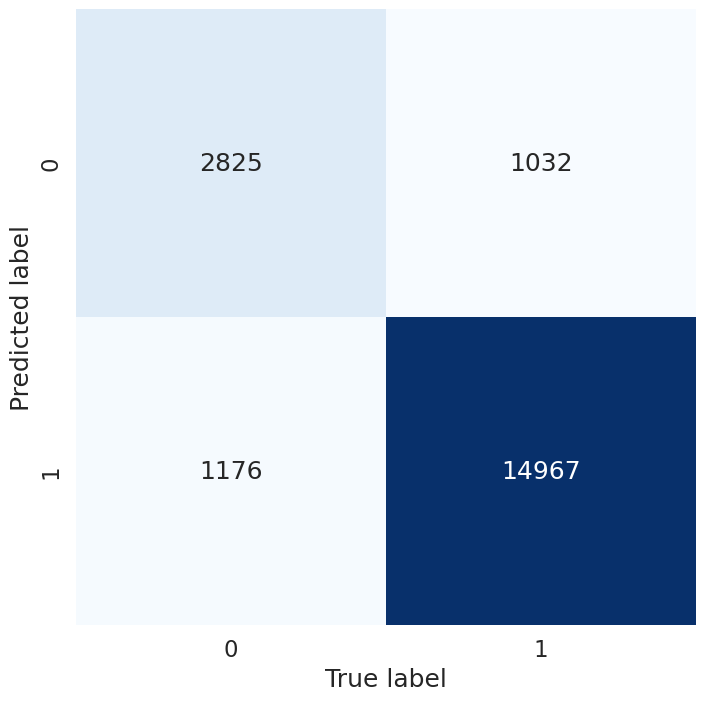

In [50]:
plot_conf_mat(y_test, y_prediction_gs_knn)

In [51]:
print(classification_report(y_test, y_prediction_gs_knn))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      3857
           1       0.94      0.93      0.93     16143

    accuracy                           0.89     20000
   macro avg       0.82      0.83      0.83     20000
weighted avg       0.89      0.89      0.89     20000



## 3. Evaluating Support Vector Machine

In [52]:
y_prediction_gs_svc = gs_svc.predict(X_test)

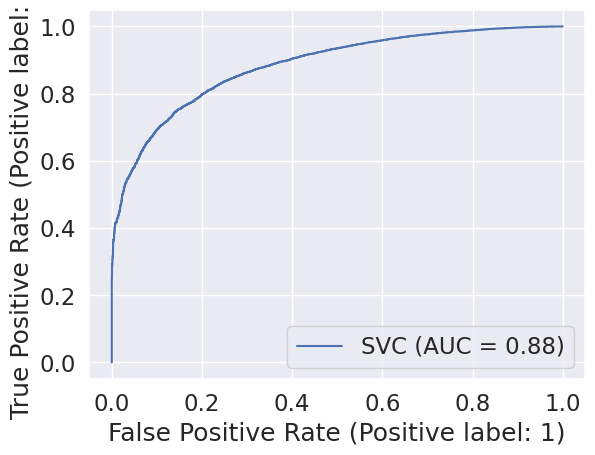

In [53]:
svc_disp = RocCurveDisplay.from_estimator(gs_svc, X_test, y_test)

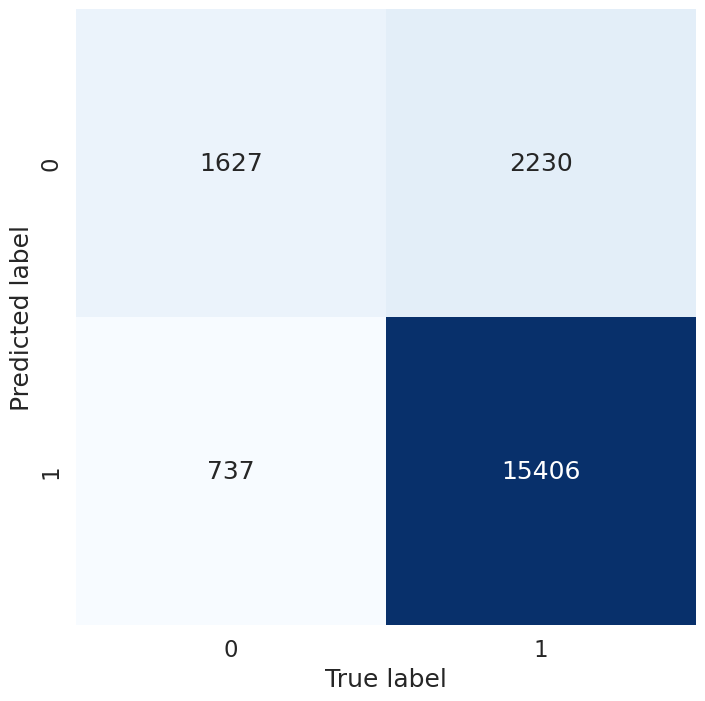

In [54]:
plot_conf_mat(y_test, y_prediction_gs_svc)

In [55]:
print(classification_report(y_test, y_prediction_gs_svc))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      3857
           1       0.87      0.95      0.91     16143

    accuracy                           0.85     20000
   macro avg       0.78      0.69      0.72     20000
weighted avg       0.84      0.85      0.84     20000



## Visualizing accuracy of tuned models

In [56]:
# Putting models into a Dictionary.
models = {"Support Vector Machine":gs_svc,
          "Naive Bayes":gs_naive_bayes,
          "KNeighbors Classifier":gs_knn}

# Creating a function to fit and score model.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Setting random seed.
    np.random.seed(42)
    # Making a Dictionary for saving model scores.
    model_scores = {}
    # Looping through the models.
    for name, model in models.items():
        # Fitting the model.
        model.fit(X_train, y_train)
        # Evaluating model and appending its score to model_scores.
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [57]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..priors=None, var_smoothing=1e-11;, score=0.899 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-11;, score=0.903 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-11;, score=0.904 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-11;, score=0.903 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-11;, score=0.900 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-10;, score=0.899 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-10;, score=0.903 total time=   0.0s
[CV 3/5] END ..priors=None, var_smoothing=1e-10;, score=0.904 total time=   0.0s
[CV 4/5] END ..priors=None, var_smoothing=1e-10;, score=0.903 total time=   0.0s
[CV 5/5] END ..priors=None, var_smoothing=1e-10;, score=0.900 total time=   0.0s
[CV 1/5] END ..priors=None, var_smoothing=1e-09;, score=0.899 total time=   0.0s
[CV 2/5] END ..priors=None, var_smoothing=1e-09;,

{'Support Vector Machine': 0.85165,
 'Naive Bayes': 0.9005,
 'KNeighbors Classifier': 0.8896}

## Model Comparison

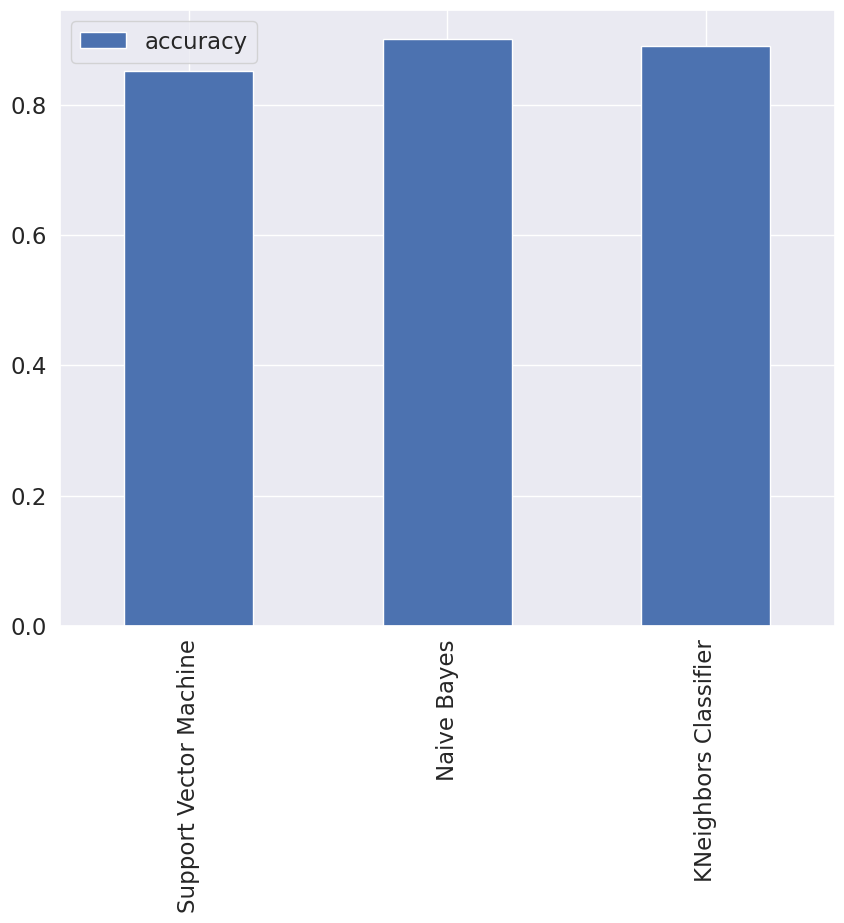

In [58]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(10, 8));

## Saving the model

In [60]:
import joblib

joblib.dump(gs_naive_bayes, 'gs_naive_bayes.joblib')